## keras构建分类模型   

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.0.0-alpha0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.14.5
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [5]:
# fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
# 训练集共60000张28x28图像
(X_train_all, y_train_all), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_all[:5000], X_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(X_valid.shape, y_valid.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


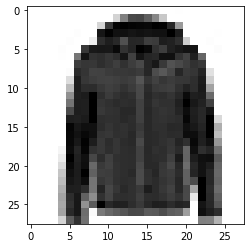

In [6]:
def show_single_img(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
    
show_single_img(X_train[0])

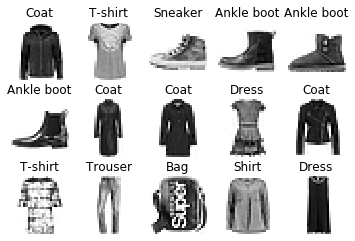

In [9]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            # 设置子图
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 
              'Bag', 'Ankle boot']
show_imgs(3, 5, X_train, y_train, class_names)

In [25]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
# 输出层为10，使用softmax将向量转换为概率分布
model.add(keras.layers.Dense(10, activation='softmax'))

# 这里的y是单个数值，当y是one-hot编码时，loss='categroical_crossentropy'
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [26]:
# 输出模型图的层
model.layers

In [27]:
# 输出模型图的描述，包括模型的参数情况
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


模型的参数量计算，以第二层为例：    
[None, 784] * W + b -> [None, 300], 该层的参数就是W和b      
W.shape = [784, 300], b.shape = [300] 所以该层的参数总量为:784 x 300 + 300 = 235500

In [28]:
# 训练，结束后会返回一个History对象    
# 分别传入训练数据和验证数据集， epochs参数指定模型在整个训练集上的迭代次数
# 每个epoch结束后，模型会在validation_data上评估一次，模型不会在该数据上训练
log_his = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 64us/sample - loss: 2.5347 - accuracy: 0.7087 - val_loss: 0.6700 - val_accuracy: 0.7712
Epoch 2/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.5714 - accuracy: 0.7912 - val_loss: 0.5606 - val_accuracy: 0.8106
Epoch 3/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.4999 - accuracy: 0.8181 - val_loss: 0.5226 - val_accuracy: 0.8260
Epoch 4/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4607 - accuracy: 0.8309 - val_loss: 0.5209 - val_accuracy: 0.8246
Epoch 5/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4306 - accuracy: 0.8405 - val_loss: 0.5055 - val_accuracy: 0.8282
Epoch 6/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4080 - accuracy: 0.8475 - val_loss: 0.4794 - val_accuracy: 0.8448
Epoch 7/10
55000/55000 [==============================] -

In [29]:
type(log_his)

tensorflow.python.keras.callbacks.History

In [30]:
# 访问History.history成员变量，是一个字典格式，输出训练过程中保存的log数据(每个epoch一组数据)
log_his.history

{'loss': [2.534727801990509,
  0.5713667000900615,
  0.4999184165347706,
  0.4607083609949459,
  0.43057776283350857,
  0.4080094921805642,
  0.39141959107138896,
  0.3748038278883154,
  0.3626000248627229,
  0.35255735424865375],
 'accuracy': [0.70870906,
  0.7911636,
  0.8181273,
  0.8309091,
  0.8405455,
  0.84745455,
  0.8546364,
  0.86056364,
  0.86405456,
  0.8674727],
 'val_loss': [0.6700145530700684,
  0.5605605638980865,
  0.5225767148971557,
  0.52086183552742,
  0.505463112449646,
  0.47938217549324036,
  0.4526525203227997,
  0.44519847383499145,
  0.44032143211364744,
  0.4283406241774559],
 'val_accuracy': [0.7712,
  0.8106,
  0.826,
  0.8246,
  0.8282,
  0.8448,
  0.852,
  0.8546,
  0.855,
  0.8558]}

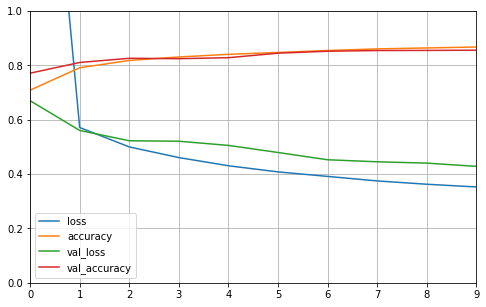

In [31]:
# 绘制训练曲线
def plot_learning_curves(history):
    # 根据传入的log字典，先打包成df
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    # 显示网格
    plt.grid(True)
    # 设置坐标轴范围
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(log_his)

上图曲线中，两个loss曲线呈下降趋势，两个acc曲线呈上升趋势   

In [32]:
# 使用测试集测试模型
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.4655 - accuracy: 0.8391


[0.4654958573937416, 0.8391]